In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
#from shapely.geometry import Point
from pyproj import CRS
from shapely.geometry import Point, Polygon, LineString, mapping
import geoplot as gplt
import geoplot.crs as gcrs
import urllib3
import contextily as ctx

In [3]:
ETHIOPIA = gpd.read_file("D:/DATASETS/WORLD\HUMANITARIAN POPGRID/\
Population density and administrative division/eth-administrative-divisions-shapefiles/\
eth_admbndl_admALL_csa_bofed_itos_20201008.shp")
#ETHIOPIA_ADM3_BOUNDARY = pd.read_excel("D:/DATASETS/WORLD/HUMANITARIAN POPGRID/\
#POP/eth_adminboundaries_tabulardata_20201028.xlsx")
#ETHIOPIA_ADM3_BOUNDARY.head()
ETHIOPIA_ADM3 = gpd.read_file("D:/DATASETS/WORLD\HUMANITARIAN POPGRID/\
Population density and administrative division/eth-administrative-divisions-shapefiles/\
eth_admbnda_adm3_csa_bofed_20201027.shp")

ETHIOPIA_ADM2 = gpd.read_file("D:/DATASETS/WORLD\HUMANITARIAN POPGRID/\
Population density and administrative division/eth-administrative-divisions-shapefiles/\
eth_admbnda_adm2_csa_bofed_20201008.shp")

ETHIOPIA_ADM1 = gpd.read_file("D:/DATASETS/WORLD\HUMANITARIAN POPGRID/\
Population density and administrative division/eth-administrative-divisions-shapefiles/\
eth_admbnda_adm1_csa_bofed_20201008.shp")

ETHIOPIA_ADM0 = gpd.read_file("D:/DATASETS/WORLD\HUMANITARIAN POPGRID/\
Population density and administrative division/eth-administrative-divisions-shapefiles/\
eth_admbnda_adm0_csa_bofed_20201008.shp")

In [4]:
HEALTH_FACI = pd.read_excel("D:/DATASETS/WORLD\HUMANITARIAN POPGRID/\
NEWWW/HEALTH_FACILITYwho-cds-gmp-2019-01-eng.xlsx")

<ipython-input-4-5cbe6a65954a>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  HEALTH_FACI = pd.read_excel("D:/DATASETS/WORLD\HUMANITARIAN POPGRID/\


In [5]:
HEALTH_FACI_ETHIO = HEALTH_FACI[HEALTH_FACI['Country']=='Ethiopia']
HEALTH_FACI_ETHIO_points = HEALTH_FACI_ETHIO.apply(lambda row: Point(row.Long, row.Lat), axis=1)
HEALTH_FACI_ETHIO_Geop = gpd.GeoDataFrame(HEALTH_FACI_ETHIO, geometry=HEALTH_FACI_ETHIO_points)
HEALTH_FACI_ETHIO_Geop.crs = CRS("EPSG:4326")

In [6]:
HEALTH_FACI_ETHIO.Admin1.value_counts()
HEALTH_FACI_ETHIO[HEALTH_FACI_ETHIO.Admin1 == "Southern Nations, Nationalities, and Peoples' Region"].head(50)

Country                                             Admin1  \
31451  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31452  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31453  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31454  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31455  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31456  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31457  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31458  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31459  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31460  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31461  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31462  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31463  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31464  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31465  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31466  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31467  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31468  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31469  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31470  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31471  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31472  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31473  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31474  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31475  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31476  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31477  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31478  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31479  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31480  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31481  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31482  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31483  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31484  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31485  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31486  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31487  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31488  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31489  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31490  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31491  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31492  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31493  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31494  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31495  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31496  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31497  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31498  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31499  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   
31500  Ethiopia  Southern Nations, Nationalities, and Peoples' ...   

                      Facility name   Facility type Ownership       Lat  \
31451      Abeke Denewa Health Post     Health Post       MoH  6.894761   
31452                   Abel Clinic          Clinic       MoH  6.022063   
31453      Aberabongodo Health Post     Health Post       MoH  6.443600   
31454              Abey Arat Clinic          Clinic       MoH  6.929346   
31455             Abey Hulet Clinic          Clinic       MoH 

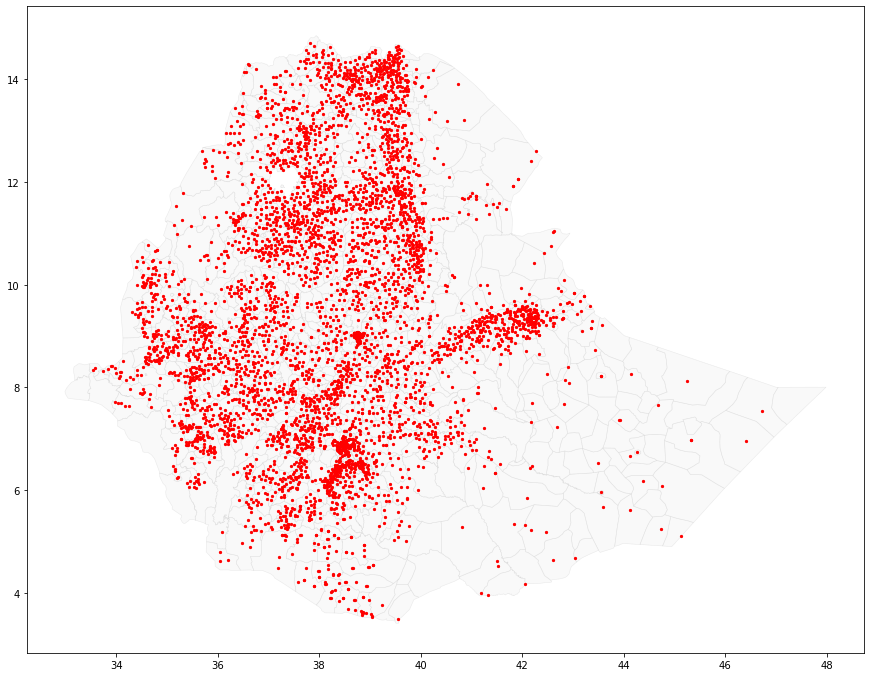

In [7]:
base = ETHIOPIA_ADM3.plot(
    figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", 
    linewidth = 0.5, markersize=5,alpha=0.5)
HEALTH_FACI_ETHIO_Geop.plot(ax=base, marker='o', color='red', markersize=5);

<AxesSubplot:>

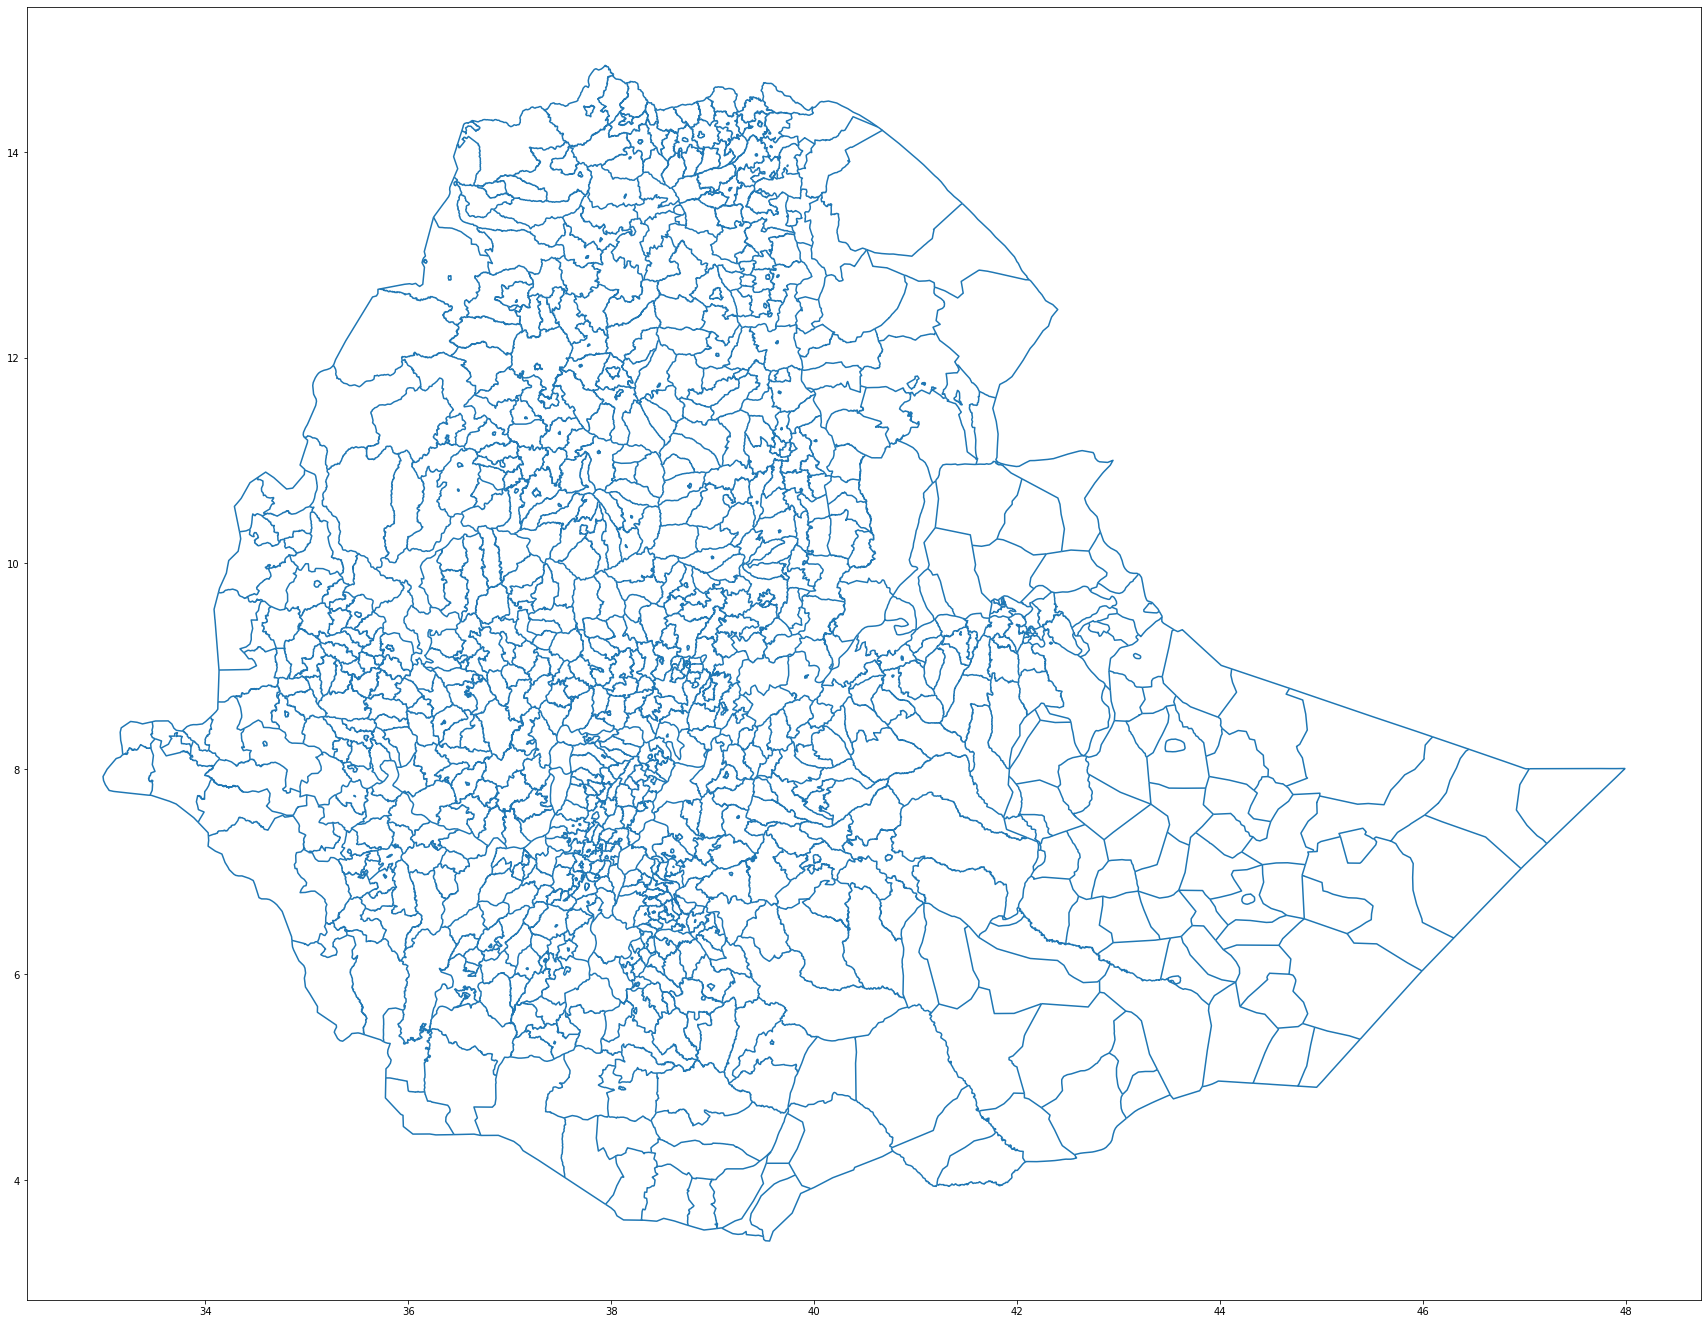

In [8]:
ETHIOPIA.plot(figsize=(30,30))

In [9]:
ETHIOPIA.head(2)

Shape_Leng  admLevel        date     validOn validTo  \
0    0.459085         0  2020-10-05  2020-10-08    None   
1    0.053627         0  2020-10-05  2020-10-08    None   

                                            geometry  
0  LINESTRING (39.49932 3.45021, 39.45866 3.46052...  
1  LINESTRING (39.09112 3.53110, 39.09059 3.53138...

In [7]:
#from shapely.geometry import Polygon, mapping

#def linestring_to_polygon(fili_shps):
#    gdf = fili_shps #LINESTRING
#    gdf['geometry'] = [Polygon(mapping(x)['coordinates']) for x in gdf.geometry]
#    return gdf

In [8]:
#ETHIOPIA.geometry.apply(lambda geom: geom.coords)

In [10]:
ETHIOPIA_ADM3[ETHIOPIA_ADM3.ADM2_EN=='Guraghe'].head(2)

Shape_Leng  Shape_Area   ADM3_EN ADM3_PCODE ADM3_REF ADM3ALT1EN  \
11     1.378248    0.042863  Abeshege   ET070102     None       None   
199    0.078941    0.000288  Bui town   ET070117     None       None   

    ADM3ALT2EN  ADM2_EN ADM2_PCODE ADM1_EN ADM1_PCODE   ADM0_EN ADM0_PCODE  \
11        None  Guraghe     ET0701    SNNP       ET07  Ethiopia         ET   
199       None  Guraghe     ET0701    SNNP       ET07  Ethiopia         ET   

           date     validOn validTo  \
11   2019-08-19  2020-10-08    None   
199  2019-08-19  2020-10-08    None   

                                              geometry  
11   MULTIPOLYGON (((37.86817 8.32089, 37.86887 8.3...  
199  POLYGON ((38.55992 8.31314, 38.55979 8.31295, ...

In [11]:
ETHIOPIA_ADM3["center"] = ETHIOPIA_ADM3["geometry"].centroid
za_points = ETHIOPIA_ADM3[ETHIOPIA_ADM3.ADM2_EN=='Guraghe'].copy()
za_points.set_geometry("center", inplace = True)

#ETHIOPIA_ADM3["center"] = ETHIOPIA_ADM3["geometry"].centroid
za_points2 = ETHIOPIA_ADM3.copy()
za_points2.set_geometry("center", inplace = True)

<ipython-input-11-e586218802a3>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ETHIOPIA_ADM3["center"] = ETHIOPIA_ADM3["geometry"].centroid


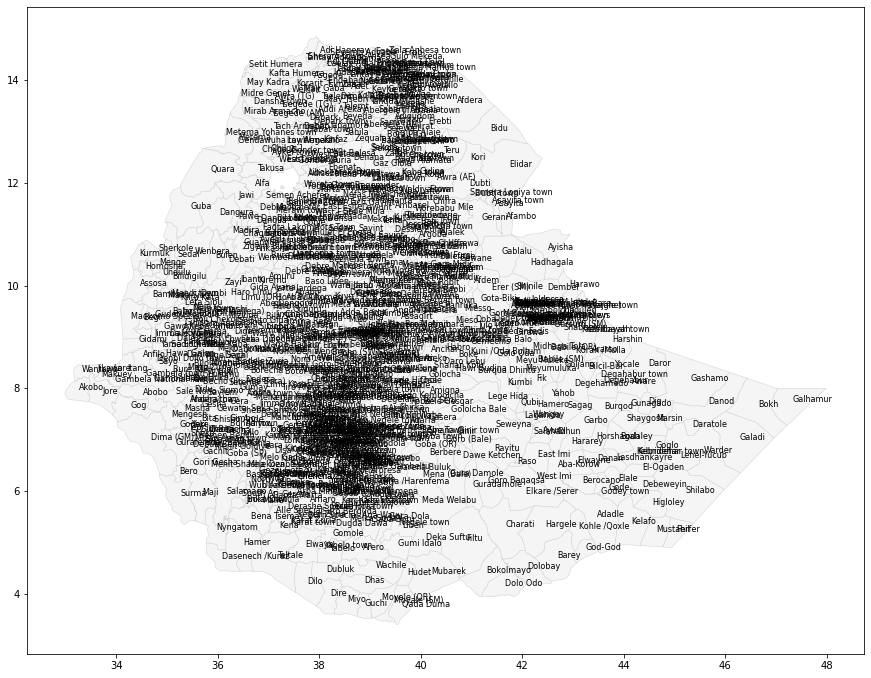

In [12]:
ax = ETHIOPIA_ADM3.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(za_points2.geometry.x, za_points2.geometry.y, za_points2["ADM3_EN"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

#aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))


C:\Users\Administrator\anaconda3\envs\GEOPANDAS1\lib\site-packages\contextily\tile.py:632: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


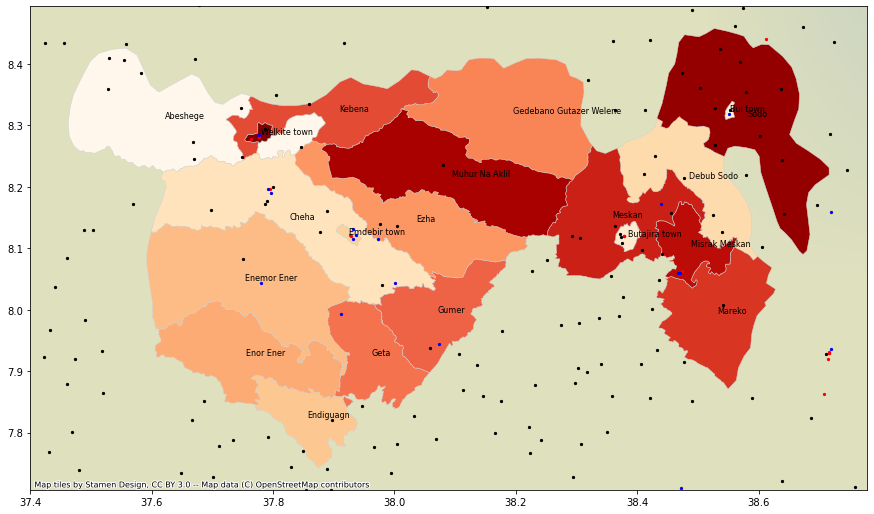

In [15]:
ax = ETHIOPIA_ADM3[ETHIOPIA_ADM3.ADM2_EN=='Guraghe'].plot(
    figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5, cmap='OrRd')
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["ADM3_EN"]):
    texts.append(plt.text(x, y, label, fontsize = 8))
ctx.add_basemap(ax)
Ethiopia_Facilities_financial_point.plot(ax=ax, marker='o', color='red', markersize=5);
Ethiopia_Facilities_education_point.plot(ax=ax, marker='o', color='blue', markersize=5);
HEALTH_FACI_ETHIO_Geop.plot(ax=ax, marker='o', color='black', markersize=5);
#aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

In [16]:
ETHIOPIA_ADM2.ADM2_EN.unique()

array(['Afder', 'Agnewak', 'Alle', 'Amaro', 'Arsi', 'Asosa', 'Awi',
       'Awsi /Zone 1', 'Bale', 'Basketo', 'Bench Sheko', 'Borena',
       'Buno Bedele', 'Burji', 'Central', 'Central Gondar', 'Daawa',
       'Dawuro', 'Derashe', 'Dire Dawa rural', 'Dire Dawa urban', 'Doolo',
       'East Bale', 'East Gojam', 'East Hararge', 'East Shewa',
       'East Wellega', 'Eastern', 'Erer', 'Fafan', 'Fanti /Zone 4',
       'Finfine Special', 'Gabi /Zone 3', 'Gamo', 'Gedeo', 'Gofa', 'Guji',
       'Guraghe', 'Hadiya', 'Halaba', 'Harari', 'Hari /Zone 5',
       'Horo Gudru Wellega', 'Ilu Aba Bora', 'Itang Special woreda',
       'Jarar', 'Jimma', 'Kefa', 'Kelem Wellega', 'Kemashi',
       'Kembata Tibaro', 'Kilbati /Zone2', 'Konso', 'Konta Special',
       'Korahe', 'Liban', 'Majang', 'Mao Komo Special', 'Mekelle',
       'Metekel', 'Mirab Omo', 'Nogob', 'North Gondar',
       'North Shewa (AM)', 'North Shewa (OR)', 'North Wello',
       'North Western', 'Nuwer', 'Oromia', 'Region 14', 'Shabelle'

In [17]:
[col for col in ETHIOPIA_ADM2.columns]

['Shape_Leng',
 'Shape_Area',
 'ADM2_EN',
 'ADM2_PCODE',
 'ADM2_REF',
 'ADM2ALT1EN',
 'ADM2ALT2EN',
 'ADM1_EN',
 'ADM1_PCODE',
 'ADM0_EN',
 'ADM0_PCODE',
 'date',
 'validOn',
 'validTo',
 'geometry']

In [18]:
ETHIOPIA_ADM2[ETHIOPIA_ADM2.ADM2_EN=='Guraghe']

Shape_Leng  Shape_Area  ADM2_EN ADM2_PCODE ADM2_REF ADM2ALT1EN ADM2ALT2EN  \
37    5.309319    0.468688  Guraghe     ET0701     None       None       None   

   ADM1_EN ADM1_PCODE   ADM0_EN ADM0_PCODE        date     validOn validTo  \
37    SNNP       ET07  Ethiopia         ET  2019-08-19  2020-10-08    None   

                                             geometry  
37  POLYGON ((38.57578 8.44489, 38.58417 8.43268, ...

<ipython-input-19-38e0cbc1e7e5>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ETHIOPIA_ADM2["center"] = ETHIOPIA_ADM2["geometry"].centroid


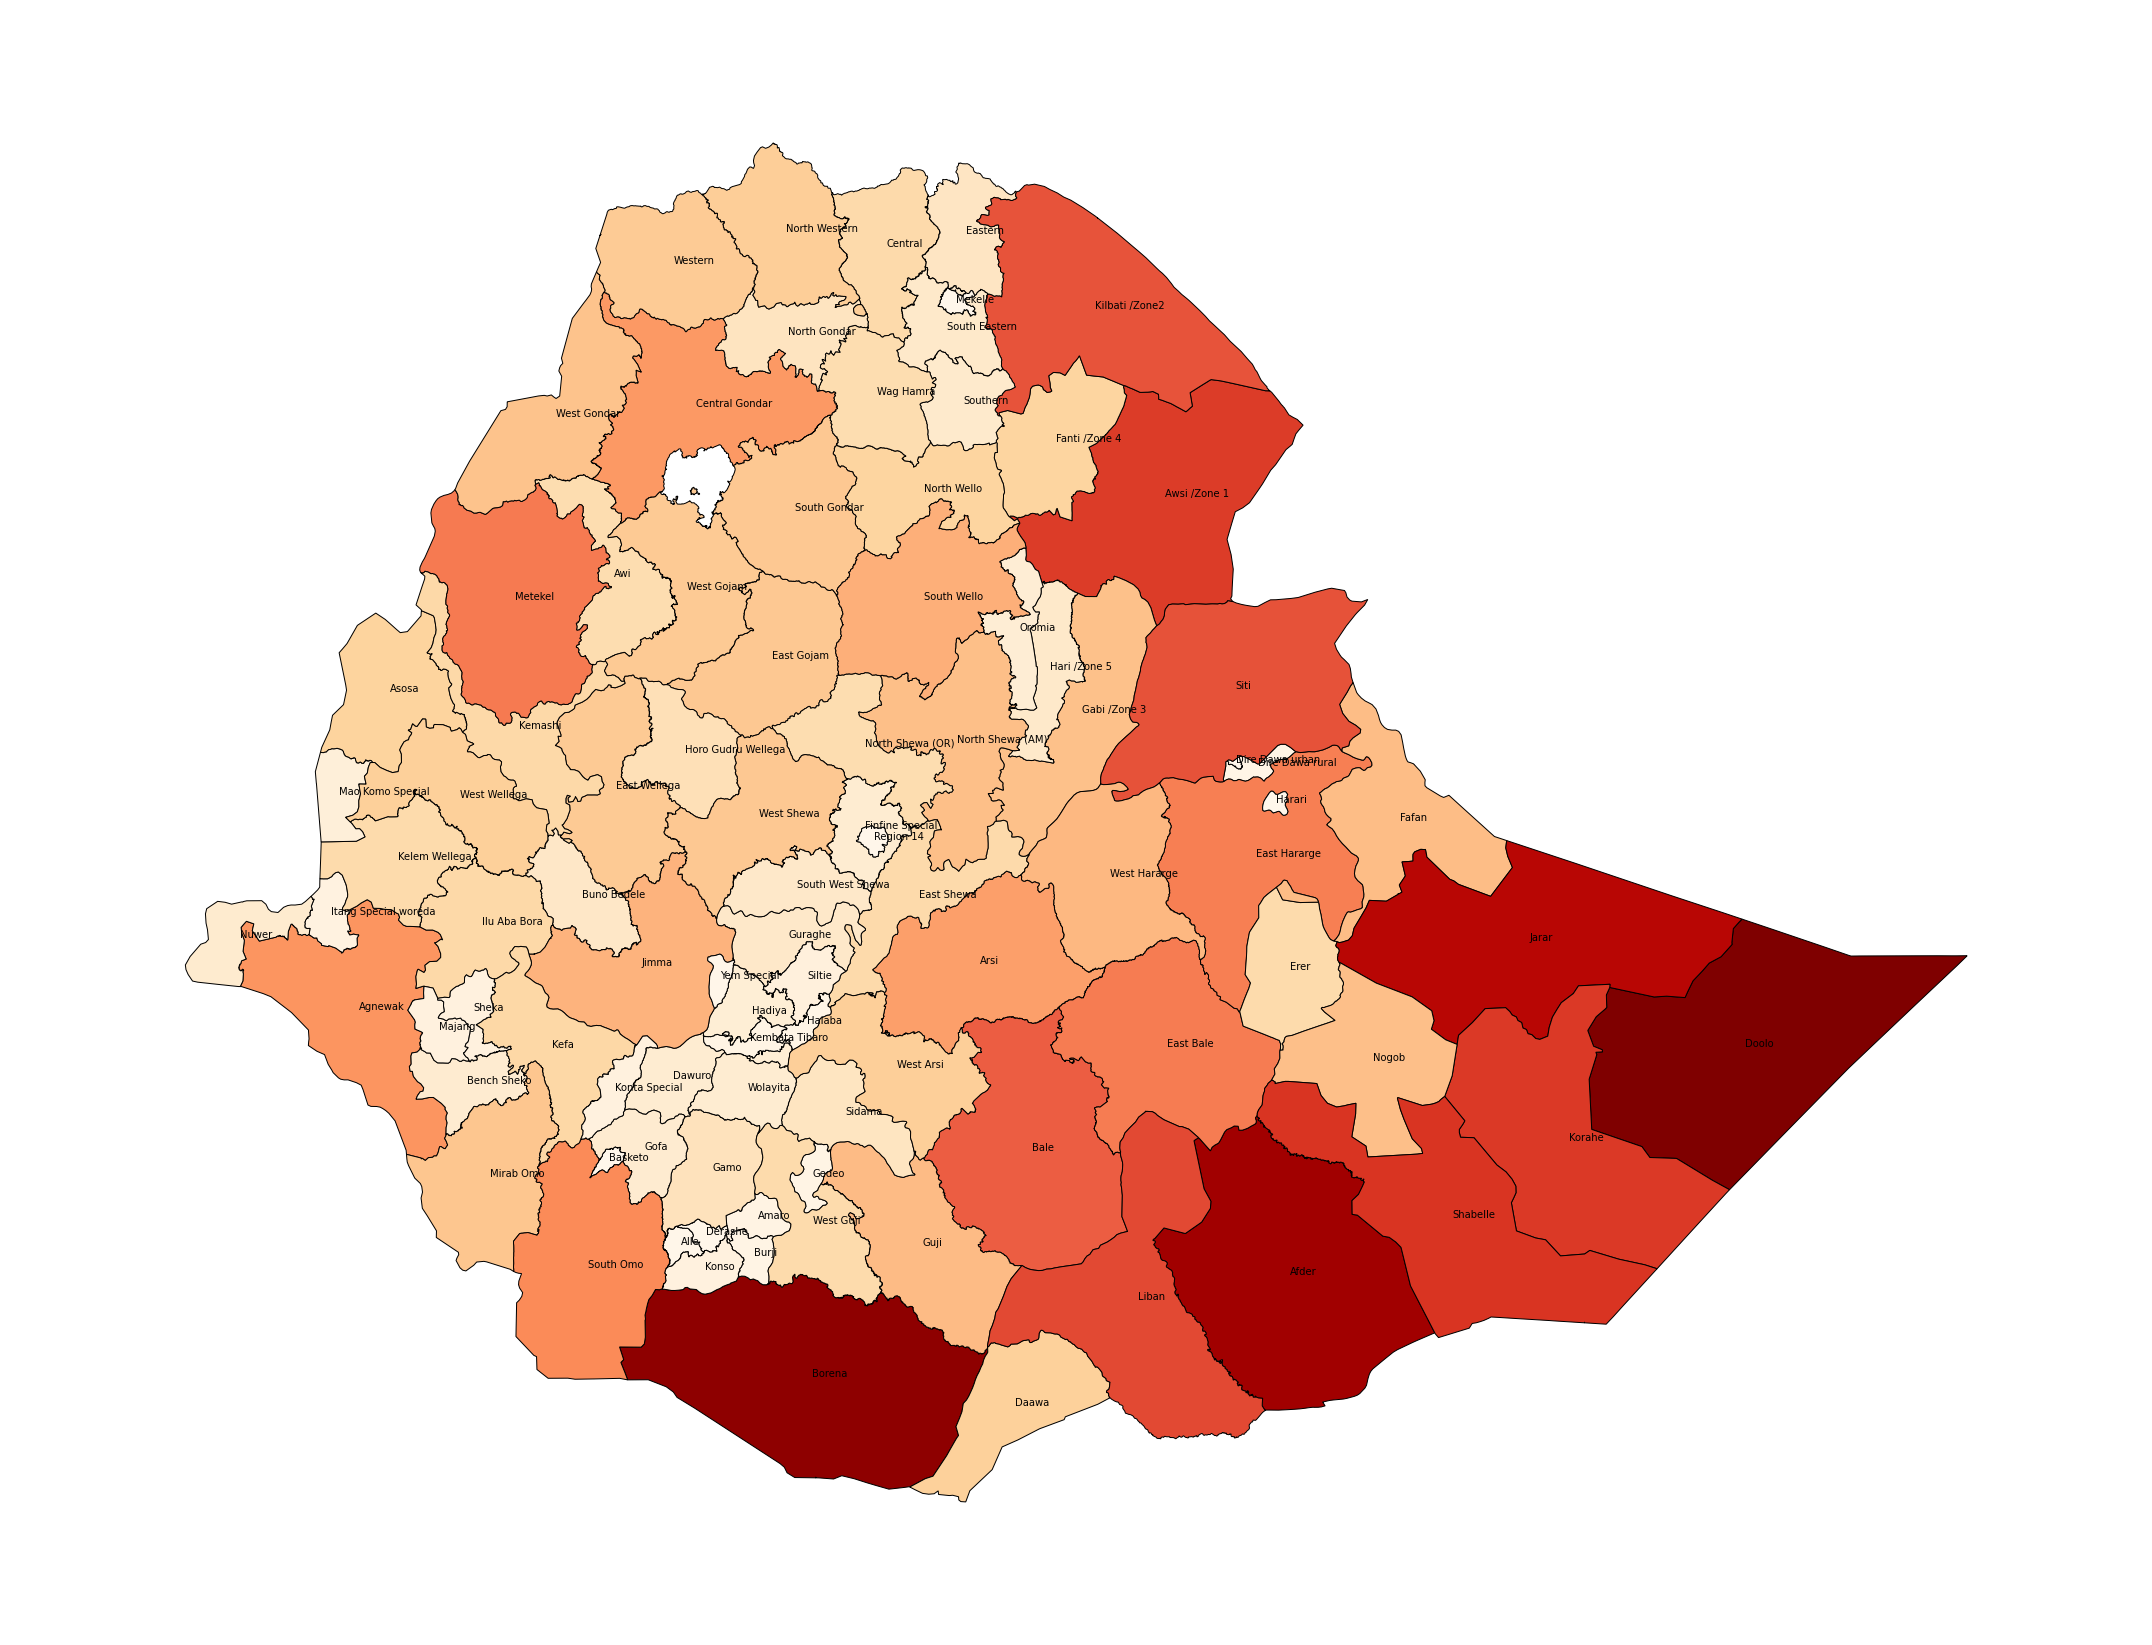

In [19]:
# Coloring shape 1. fill
# color 2. 
#ax = ETHIOPIA_ADM2.plot(figsize=(20,20), color='grey', edgecolor='white')
#ax.axis('off')
gplt.choropleth(ETHIOPIA_ADM2, hue = ETHIOPIA_ADM2['Shape_Area'], cmap = 'OrRd', figsize = (60,30))

ETHIOPIA_ADM2["center"] = ETHIOPIA_ADM2["geometry"].centroid
za_points3 = ETHIOPIA_ADM2.copy()
za_points3.set_geometry("center", inplace = True)

for x, y, label in zip(za_points3.geometry.x, za_points3.geometry.y, za_points3["ADM2_EN"]):
    texts.append(plt.text(x, y, label, fontsize = 10))

<ipython-input-20-2215be975792>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ETHIOPIA_ADM1["center"] = ETHIOPIA_ADM1["geometry"].centroid
C:\Users\Administrator\anaconda3\envs\GEOPANDAS1\lib\site-packages\contextily\tile.py:632: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


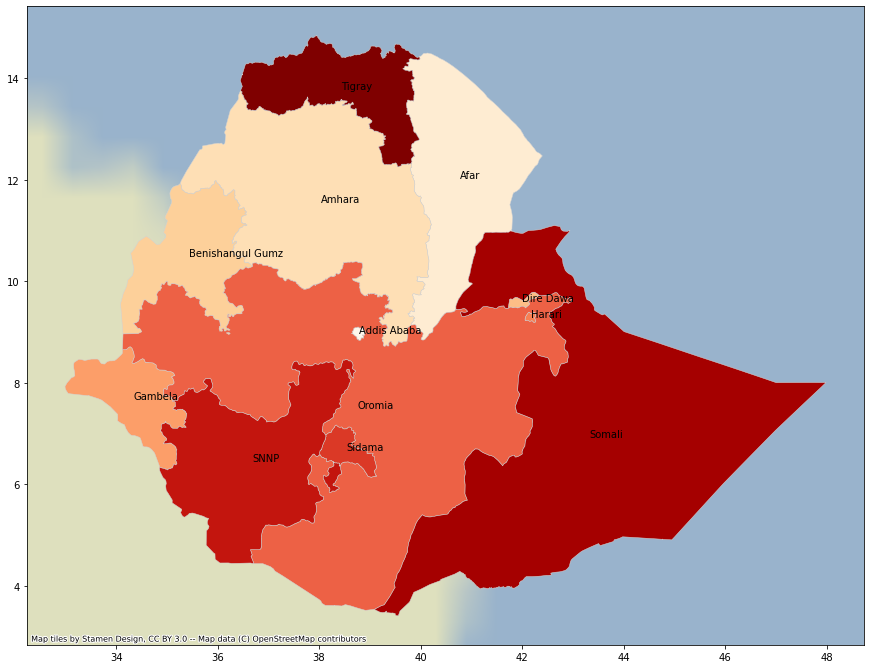

In [20]:
# Coloring shape 1. fill
# color 2. 
#ax = ETHIOPIA_ADM2.plot(figsize=(20,20), color='grey', edgecolor='white')
#ax.axis('off')
#gplt.choropleth(ETHIOPIA_ADM1, hue = ETHIOPIA_ADM1['Shape_Area'], cmap = 'OrRd', figsize = (60,30))

ax = ETHIOPIA_ADM1.plot(
    figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5, cmap='OrRd')
texts = []

ETHIOPIA_ADM1["center"] = ETHIOPIA_ADM1["geometry"].centroid
za_points4 = ETHIOPIA_ADM1.copy()
za_points4.set_geometry("center", inplace = True)

for x, y, label in zip(za_points4.geometry.x, za_points4.geometry.y, za_points4["ADM1_EN"]):
    texts.append(plt.text(x, y, label, fontsize = 10))
ctx.add_basemap(ax)

C:\Users\Administrator\anaconda3\envs\GEOPANDAS1\lib\site-packages\contextily\tile.py:632: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


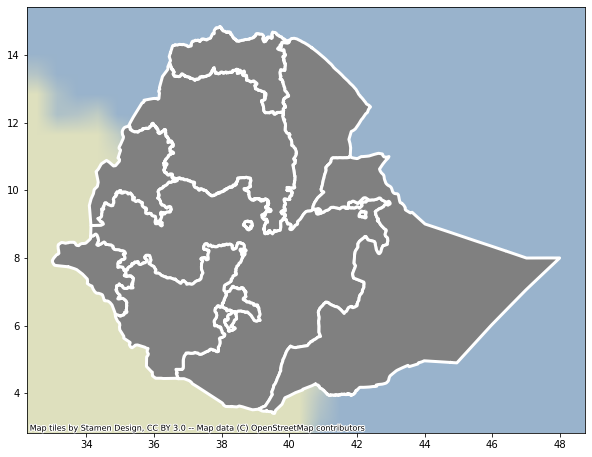

In [21]:
ax = ETHIOPIA_ADM1.plot(figsize=(10,10), color='grey', edgecolor='white', linewidth=3)
#ax.axis('off')
ctx.add_basemap(ax)

In [ ]:
# 1. opening up the CSV with pandas
# 2. we'll take lat/lon feed it to shapely, which creates a point
# 3. feed original dataframe + geometry => geodataframe
# 4. tell the new geodataframe that coords are latitude and longtiude


In [14]:
population_Ethio = pd.read_csv("D:/DATASETS/WORLD/HUMANITARIAN POPGRID/\
Population density and administrative division/population_eth_2018-10-01.csv")

Ethiopia_Roads_line = gpd.read_file('D:/DATASETS/WORLD/HUMANITARIAN POPGRID/roads/\
hotosm_eth_roads_lines_shp/hotosm_eth_roads_lines.shp')
Ethiopia_Roads_poligon = gpd.read_file('D:/DATASETS/WORLD/HUMANITARIAN POPGRID/roads/\
hotosm_eth_roads_polygons_shp/hotosm_eth_roads_polygons.shp')
Ethiopia_Roads_network = gpd.read_file('D:/DATASETS/WORLD/HUMANITARIAN POPGRID/roads/\
ethiopia_roads_network/Ethiopia_roads_network.shp')


Ethiopia_Facilities_education_point = gpd.read_file('D:/DATASETS/WORLD/HUMANITARIAN POPGRID/Facilities/\
hotosm_eth_education_facilities_points_shp/hotosm_eth_education_facilities_points.shp')
Ethiopia_Facilities_education_polygon = gpd.read_file('D:/DATASETS/WORLD/HUMANITARIAN POPGRID/Facilities/\
hotosm_eth_education_facilities_polygons_shp/hotosm_eth_education_facilities_polygons.shp')
Ethiopia_Facilities_financial_point = gpd.read_file('D:/DATASETS/WORLD/HUMANITARIAN POPGRID/Facilities/\
hotosm_eth_financial_services_points_shp/hotosm_eth_financial_services_points.shp')
Ethiopia_Facilities_financial_polygon = gpd.read_file('D:/DATASETS/WORLD/HUMANITARIAN POPGRID/Facilities/\
hotosm_eth_financial_services_polygons_shp/hotosm_eth_financial_services_polygons.shp')
Ethiopia_Facilities_populated_point = gpd.read_file('D:/DATASETS/WORLD/HUMANITARIAN POPGRID/Facilities/\
hotosm_eth_populated_places_points_shp/hotosm_eth_populated_places_points.shp')
Ethiopia_Facilities_populated_polygon = gpd.read_file('D:/DATASETS/WORLD/HUMANITARIAN POPGRID/Facilities/\
hotosm_eth_populated_places_polygons_shp/hotosm_eth_populated_places_polygons.shp')

In [23]:
ETHIOPIA_ADM3.head()

Shape_Leng  Shape_Area      ADM3_EN ADM3_PCODE ADM3_REF ADM3ALT1EN  \
0    1.950532    0.171323    Aba-Korow   ET050699     None       None   
1    2.034157    0.080343       Abaala   ET020203     None    Aba Ala   
2    0.631023    0.015790  Abaala town   ET020209     None    Aba Ala   
3    1.575575    0.078659        Ababo   ET041904     None       None   
4    0.227439    0.001580       Abadir   ET130109     None       None   

  ADM3ALT2EN             ADM2_EN ADM2_PCODE ADM1_EN ADM1_PCODE   ADM0_EN  \
0       None            Shabelle     ET0506  Somali       ET05  Ethiopia   
1       None      Kilbati /Zone2     ET0202    Afar       ET02  Ethiopia   
2       None      Kilbati /Zone2     ET0202    Afar       ET02  Ethiopia   
3       None  Horo Gudru Wellega     ET0419  Oromia       ET04  Ethiopia   
4       None              Harari     ET1301  Harari       ET13  Ethiopia   

  ADM0_PCODE        date     validOn validTo  \
0         ET  2019-08-19  2020-10-08    None   
1         ET  2019-08-19  2020-10-08    None   
2         ET  2019-08-19  2020-10-08    None   
3         ET  2019-08-19  2020-10-08    None   
4         ET  2019-08-19  2020-10-08    None   

                                            geometry  \
0  POLYGON ((42.79826 6.19605, 42.79641 6.19571, ...   
1  POLYGON ((39.92615 13.57223, 39.92848 13.57105...   
2  POLYGON ((39.76732 13.28527, 39.76242 13.28345...   
3  POLYGON ((37.39245 10.04636, 37.39828 10.04615...   
4  POLYGON ((42.13371 9.32294, 42.13386 9.32290, ...   

                      center  
0   POINT (42.69829 6.47533)  
1  POINT (39.87610 13.36890)  
2  POINT (39.79135 13.35984)  
3   POINT (37.52098 9.80858)  
4   POINT (42.12275 9.31044)

In [24]:
Ethiopia_Facilities_education_point.head()

osm_id addrcity capacitype source     amenity  \
0  445313466.0     None       None   None      school   
1  445313467.0     None       None   None      school   
2  460344341.0     None       None   None  university   
3  463219668.0     None       None   None     college   
4  471337506.0     None       None   None     college   

                                  name addrfull building operatorty  \
0                     Unity University     None     None       None   
1                          CPU College     None     None       None   
2  Adi Haki Campus, Mekelle University     None     None       None   
3               Bethel Medical College     None     None       None   
4      Wukro Agricultural TVET College     None     None       None   

                    geometry  
0   POINT (38.80434 9.00017)  
1   POINT (38.80249 9.00068)  
2  POINT (39.45503 13.48834)  
3   POINT (38.73073 9.01439)  
4  POINT (39.60411 13.78233)

In [25]:
population_Ethio.head()

latitude  longitude  population_2015  population_2020
0  3.404306  39.366528       110.421032       124.431495
1  3.404583  39.367639       110.421032       124.431495
2  3.404861  39.365694       110.421032       124.431495
3  3.404861  39.366250       110.421032       124.431495
4  3.404861  39.366528       110.421032       124.431495

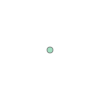

In [26]:
# this is how shapely works longitude,latittude
Point(-78,41) #Point([-78,41])

In [27]:
points = population_Ethio.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
Population_Ethio_Geop = gpd.GeoDataFrame(population_Ethio, geometry=points)
Population_Ethio_Geop.crs = CRS("EPSG:4326")

In [28]:
Population_Ethio_Geop.head()

latitude  longitude  population_2015  population_2020  \
0  3.404306  39.366528       110.421032       124.431495   
1  3.404583  39.367639       110.421032       124.431495   
2  3.404861  39.365694       110.421032       124.431495   
3  3.404861  39.366250       110.421032       124.431495   
4  3.404861  39.366528       110.421032       124.431495   

                   geometry  
0  POINT (39.36653 3.40431)  
1  POINT (39.36764 3.40458)  
2  POINT (39.36569 3.40486)  
3  POINT (39.36625 3.40486)  
4  POINT (39.36653 3.40486)

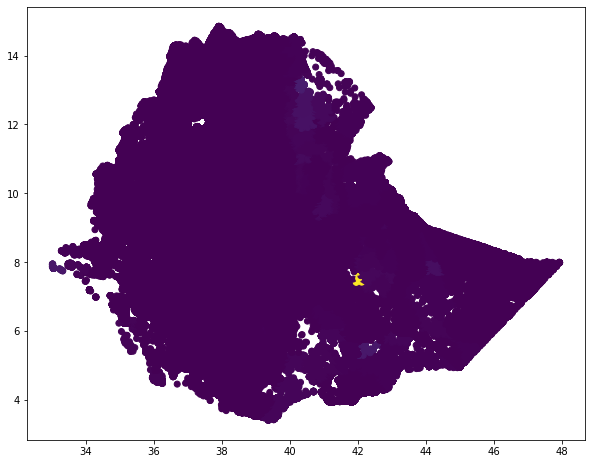

In [30]:
Population_Ethio_Geop.plot(figsize=(10,10),column='population_2015');

In [31]:
print(Ethiopia_Facilities_financial_point.amenity.value_counts(normalize=True))
print(Ethiopia_Facilities_financial_point.addrcity.value_counts())
Ethiopia_Facilities_financial_point.head(4)

bank                0.829567
atm                 0.124597
post_office         0.039380
bureau_de_change    0.006456
Name: amenity, dtype: float64
Addis Ababa    75
funyanbira      3
Huruta          3
Hawassa         1
Kombolchs       1
nekemt          1
Kombosha        1
Moyale          1
Name: addrcity, dtype: int64


osm_id     addrcity source      amenity network  \
0  262991780.0  Addis Ababa   None         bank    None   
1  462218983.0         None   None  post_office    None   
2  462218997.0         None   None         bank    None   
3  462219000.0         None   None         bank    None   

                                               name addrfull operator  \
0                Zemen Bank Bole MedhaneAlem Branch     None     None   
1                               Mekelle Post Office     None     None   
2  Commercial Bank of Ethiopia, Agazi Avenue Branch     None     None   
3                                       Dashen Bank     None     None   

                    geometry  
0   POINT (38.79021 8.99441)  
1  POINT (39.47407 13.49628)  
2  POINT (39.47783 13.49585)  
3  POINT (39.47656 13.49629)

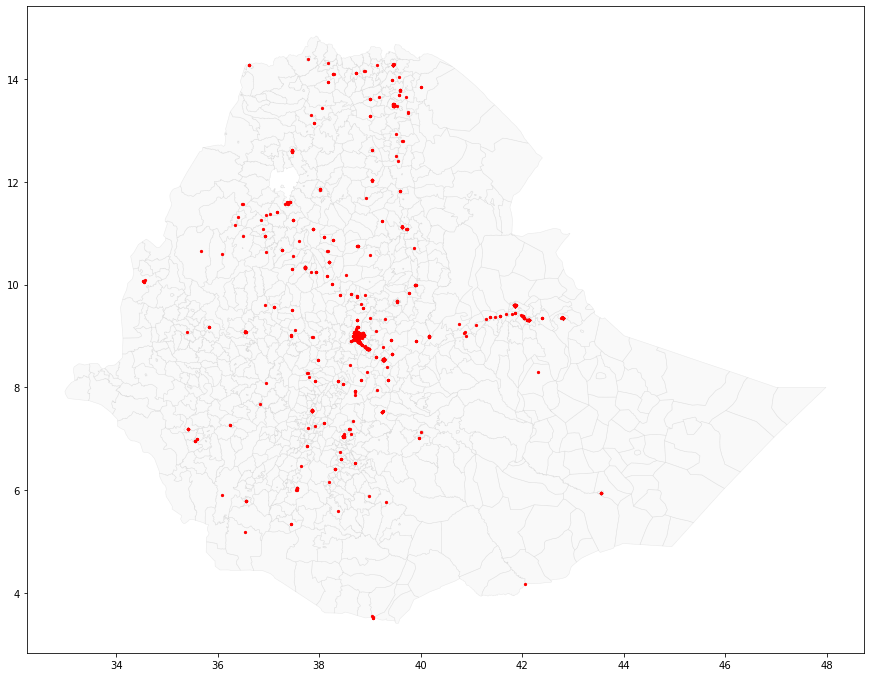

In [32]:
base = ETHIOPIA_ADM3.plot(
    figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", 
    linewidth = 0.5, markersize=5,alpha=0.5)
Ethiopia_Facilities_financial_point.plot(ax=base, marker='o', color='red', markersize=5);

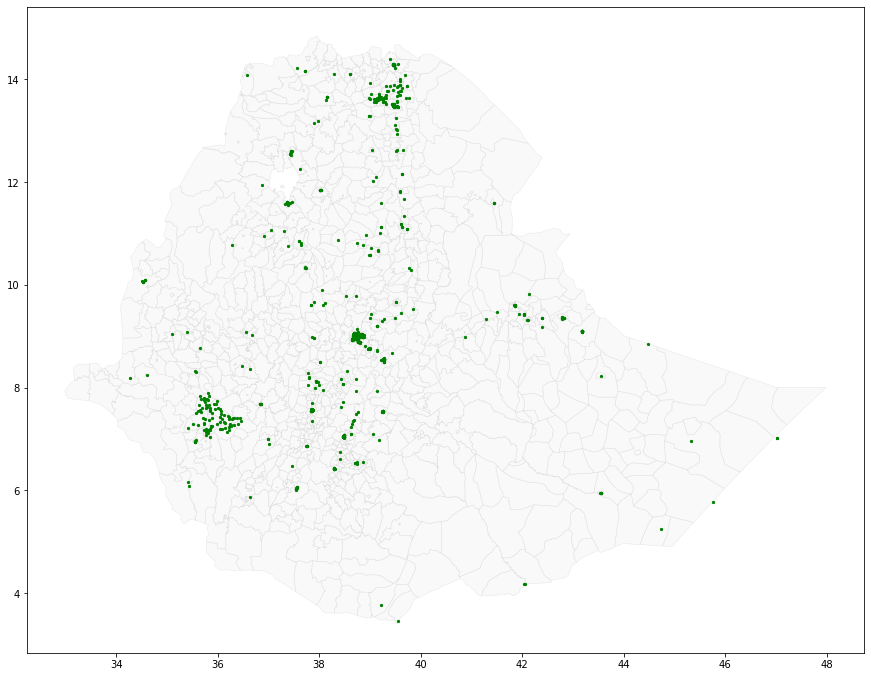

In [61]:
base = ETHIOPIA_ADM3.plot(
    figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", 
    linewidth = 0.5, markersize=5,alpha=0.5)
Ethiopia_Facilities_education_point.plot(ax=base, marker='o', color='green', markersize=5);

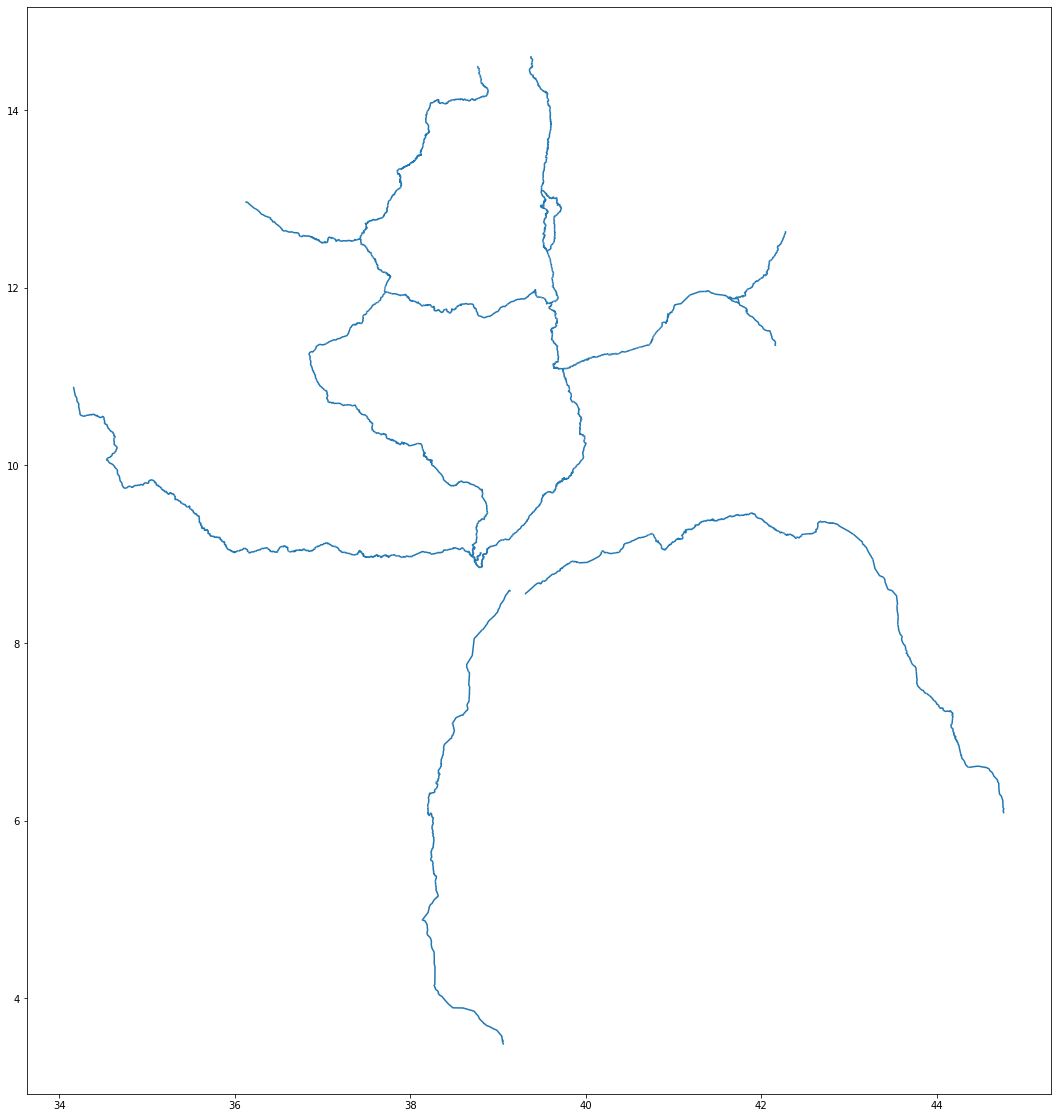

In [83]:
Ethiopia_Roads_network
Ethiopia_Roads_poligon
Ethiopia_Roads_line[Ethiopia_Roads_line.highway=='trunk'].plot(figsize=(20,20));

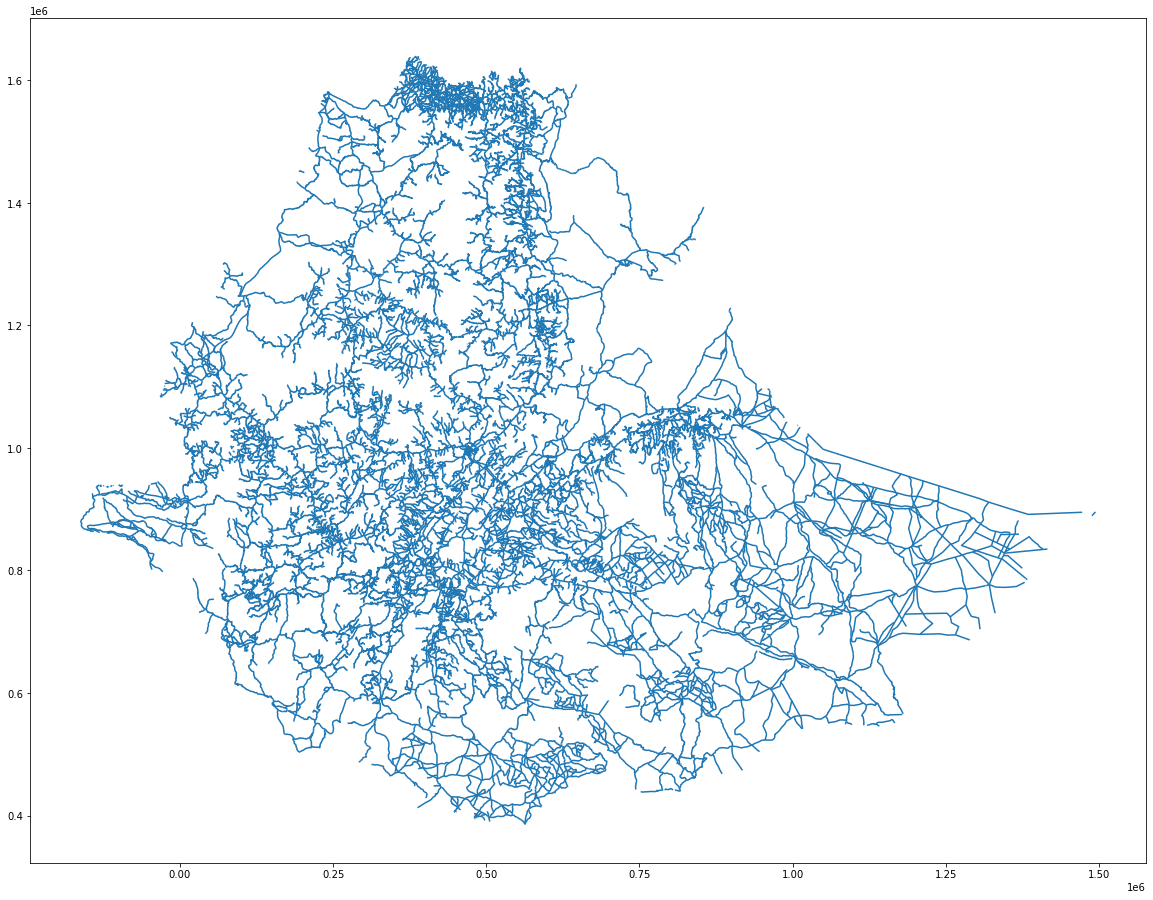

In [64]:
Ethiopia_Roads_network.plot(figsize=(20,20));

In [65]:
Ethiopia_Roads_line.head(3)

osm_id        source bridge      highway  name layer smoothness lanes  \
0  4677317.0  Yahoo Images   None  residential  None  None       None  None   
1  4677323.0          None   None  residential  None  None       None  None   
2  4677325.0          None   None  residential  None  None       None  None   

  oneway  surface width                                           geometry  
0   None  unpaved  None  LINESTRING (38.79066 9.01506, 38.79122 9.01521...  
1   None    paved  None  LINESTRING (38.79160 9.01134, 38.79170 9.01075...  
2   None     None  None  LINESTRING (38.79085 9.01426, 38.79141 9.01440...

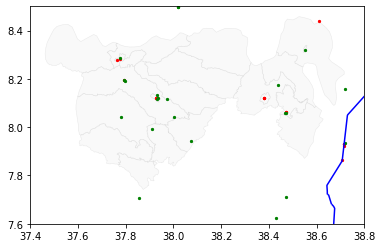

In [82]:
fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

ETHIOPIA_ADM3[ETHIOPIA_ADM3.ADM2_EN=='Guraghe'].plot(ax=ax,
    figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", 
    linewidth = 0.5, markersize=5,alpha=0.5)

Ethiopia_Facilities_financial_point.plot(ax=ax, marker='o', color='red', markersize=5);
Ethiopia_Facilities_education_point.plot(ax=ax, marker='o', color='green', markersize=5,zorder=1);
#Ethiopia_Facilities_populated_point.plot(ax=ax, marker='o', color='blue', markersize=5);
#Ethiopia_Roads_line.plot(ax=ax, marker='o', color='blue', markersize=0.1);
Ethiopia_Roads_line[Ethiopia_Roads_line.highway=='trunk'].plot(ax=ax, marker='o', color='blue', markersize=0.1);
ax.set_xlim([37.4,38.8])
ax.set_ylim([7.6,8.5])
plt.show();

In [69]:
Ethiopia_Roads_line.highway.value_counts()
#service, track,path, tertiary, primary, secondary, trunk
Ethiopia_Roads_line[Ethiopia_Roads_line.highway=='trunk']

residential       186787
unclassified       45090
path               27261
track              21259
service            10103
tertiary            6623
primary             3510
secondary           3497
trunk               2293
footway             1411
primary_link         540
trunk_link           291
secondary_link       289
construction         261
tertiary_link        179
steps                 83
motorway_link         65
motorway              51
bridleway             25
living_street         11
pedestrian            10
platform               6
road                   5
bus_guideway           1
rest_area              1
Name: highway, dtype: int64

In [88]:
Ethiopia_Roads_network.head().T
#Ethiopia_Roads_network.columns
Ethiopia_Roads_network.Administra.value_counts()
#Ethiopia_Roads_network[Ethiopia_Roads_network.Administra=='trunk']

Somali         1944
ERA            1526
South Sudan      16
Kenya             9
Name: Administra, dtype: int64

<AxesSubplot:>

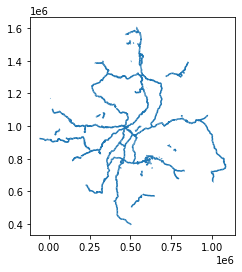

In [90]:
Ethiopia_Roads_network[Ethiopia_Roads_network.Administra=='ERA'].plot()


In [43]:
BRI_RAIL = gpd.read_file('D:/DATASETS/WORLD/data BRI/data/\
geojson/shp/bri_rail.shp')
BRI_ROAD = gpd.read_file('D:/DATASETS/WORLD/data BRI/data/\
geojson/shp/bri_road.shp')
BRI_SEA = gpd.read_file('D:/DATASETS/WORLD/data BRI/data/\
geojson/shp/bri_sea.shp')

<AxesSubplot:>

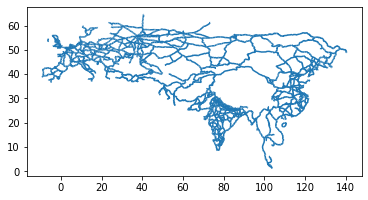

In [53]:
BRI_RAIL.plot()

In [49]:
BRI_RAIL2 = gpd.read_file('D:/DATASETS/WORLD/data BRI/data/\
geojson/rails_postbri.geojson')

In [51]:
BRI_RAIL2.continent.unique()

array(['Asia', 'Europe', None], dtype=object)

In [56]:
BRI_RAIL = gpd.read_file('C:/Users/Administrator/Desktop/Python new1/SPATIAL BRI/data/data/geojson/\
rails_prebri.geojson')

<AxesSubplot:>

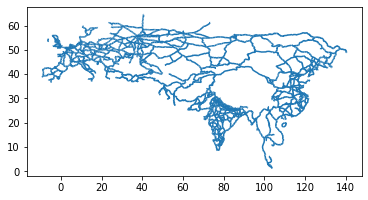

In [57]:
BRI_RAIL.plot()

# SPACIAL JOINS
$1 \space colum \space join$ take dataset A + dataset B = DatasetAB, based on a common column

$2 \space colum \space join$ take dataset A + dataset B = DatasetAB, based on a space/geographic r/s

In [58]:
print(ETHIOPIA.head(2))
print(Ethiopia_Facilities_education_point.head(2))
ETHIOPIA_ADM1
ETHIOPIA_ADM2

   Shape_Leng  admLevel        date     validOn validTo  \
0    0.459085         0  2020-10-05  2020-10-08    None   
1    0.053627         0  2020-10-05  2020-10-08    None   

                                            geometry  
0  LINESTRING (39.49932 3.45021, 39.45866 3.46052...  
1  LINESTRING (39.09112 3.53110, 39.09059 3.53138...  
        osm_id addrcity capacitype source amenity              name addrfull  \
0  445313466.0     None       None   None  school  Unity University     None   
1  445313467.0     None       None   None  school       CPU College     None   

  building operatorty                  geometry  
0     None       None  POINT (38.80434 9.00017)  
1     None       None  POINT (38.80249 9.00068)  


In [92]:
ADMIN0_WITH_EDUC1 = gpd.sjoin(ETHIOPIA,Ethiopia_Facilities_education_polygon, how='inner', op='contains')
ADMIN0_WITH_EDUC1.head(6)

Empty GeoDataFrame
Columns: [Shape_Leng, admLevel, date, validOn, validTo, geometry, index_right, osm_id, addrcity, capacitype, source, amenity, name, addrfull, building, operatorty]
Index: []

In [93]:
ADMIN0_WITH_EDUC2 = gpd.sjoin(ETHIOPIA_ADM1,Ethiopia_Facilities_education_point, how='inner', op='contains')
ADMIN0_WITH_EDUC2.head(6)

Shape_Leng  Shape_Area      ADM1_EN ADM1_PCODE ADM1_REF ADM1ALT1EN  \
0    1.010869    0.044369  Addis Ababa       ET14     None       None   
0    1.010869    0.044369  Addis Ababa       ET14     None       None   
0    1.010869    0.044369  Addis Ababa       ET14     None       None   
0    1.010869    0.044369  Addis Ababa       ET14     None       None   
0    1.010869    0.044369  Addis Ababa       ET14     None       None   
0    1.010869    0.044369  Addis Ababa       ET14     None       None   

  ADM1ALT2EN   ADM0_EN ADM0_PCODE        date  ... index_right        osm_id  \
0       None  Ethiopia         ET  2019-08-19  ...         268  4.538964e+09   
0       None  Ethiopia         ET  2019-08-19  ...          17  7.324482e+08   
0       None  Ethiopia         ET  2019-08-19  ...         270  4.550969e+09   
0       None  Ethiopia         ET  2019-08-19  ...         289  4.611634e+09   
0       None  Ethiopia         ET  2019-08-19  ...          24  8.374338e+08   
0       None  Ethiopia         ET  2019-08-19  ...         742  7.148741e+09   

      addrcity  capacitype  source     amenity                           name  \
0         None        None    None      school                           None   
0         None        None    None  university  AAU Faculty of Natural Scince   
0  Addis Ababa        None    None     college                     Art School   
0  Addis Ababa        None    None     college  Computational Science Program   
0  Addis Ababa        None    None      school         Kolfe Secondary school   
0         None        None    None      school    Indian International School   

  addrfull building operatorty  
0     None     None       None  
0     None     None       None  
0     None     None       None  
0     None   office       None  
0     None     None       None  
0     None     None       None  

[6 rows x 23 columns]

In [64]:
ADMIN0_WITH_EDUC = gpd.sjoin(Ethiopia_Facilities_education_point,ETHIOPIA_ADM1, how='inner', op='within')
ADMIN0_WITH_EDUC.head(6)

osm_id     addrcity capacitype source  amenity  \
0   445313466.0         None       None   None   school   
1   445313467.0         None       None   None   school   
3   463219668.0         None       None   None  college   
14  650303286.0         None       None   None   school   
15  726895314.0  Addis Ababa       None   None  college   
16  732448178.0         None       None   None   school   

                          name addrfull building operatorty  \
0             Unity University     None     None       None   
1                  CPU College     None     None       None   
3       Bethel Medical College     None     None       None   
14             Birhan Ethiopia     None     None       None   
15  St. Lideta Medical College     None     None       None   
16              Italian School     None     None       None   

                    geometry  ...      ADM1_EN  ADM1_PCODE  ADM1_REF  \
0   POINT (38.80434 9.00017)  ...  Addis Ababa        ET14      None   
1   POINT (38.80249 9.00068)  ...  Addis Ababa        ET14      None   
3   POINT (38.73073 9.01439)  ...  Addis Ababa        ET14      None   
14  POINT (38.75725 9.03682)  ...  Addis Ababa        ET14      None   
15  POINT (38.73741 9.01095)  ...  Addis Ababa        ET14      None   
16  POINT (38.74923 9.04362)  ...  Addis Ababa        ET14      None   

   ADM1ALT1EN ADM1ALT2EN   ADM0_EN ADM0_PCODE        date     validOn validTo  
0        None       None  Ethiopia         ET  2019-08-19  2020-10-08    None  
1        None       None  Ethiopia         ET  2019-08-19  2020-10-08    None  
3        None       None  Ethiopia         ET  2019-08-19  2020-10-08    None  
14       None       None  Ethiopia         ET  2019-08-19  2020-10-08    None  
15       None       None  Ethiopia         ET  2019-08-19  2020-10-08    None  
16       None       None  Ethiopia         ET  2019-08-19  2020-10-08    None  

[6 rows x 23 columns]

In [78]:
ADMIN0_WITH_EDUC[ADMIN0_WITH_EDUC.ADM1_EN=='SNNP'].name.value_counts()

ሚዛን-አማን ጤና ሳይንስ ኮሌጅ                        2
Dalli secondary school                     2
Yeror                                      1
Esara Secondary school                     1
Arba Minch Health Science College          1
Abaya Secondary School                     1
Hibret frie                                1
ሊጋባ በየነ ኣባ ሰብስብ ት/ቤት                       1
Selam Ber High School                      1
ቅዱስ ዬሴፍ ካቶሊ ት/ቤት                           1
ሆሳዕና ጤና ሰይንስ ኮሌጅ                           1
አባ                                         1
Primary school                             1
ዋቸሞ ዩንቨሪሲቲ                                 1
St. Marco school                           1
ሆሳዕና ቴክንክና ሙያ ማሰልጠኛ ኮለረጅ                   1
አንጋጫ መሰናዶ ት/ቤት                             1
የካትት 25/1967                               1
Arba Minch University Main Campus-AMIT     1
ዋቸሞ አጠቃላይ ከፍተኛ ት/ቤት                        1
Lemat school                               1
አንደኛ ደረጃ ት/ቤት                              1
Yet Nebers

In [79]:
Ethiopia_Facilities_education_polygon

osm_id addrcity capacitype source  amenity  \
0      27244679.0     None       None   None   school   
1      27293501.0     None       None  yahoo  college   
2      28849796.0     None       None   None   school   
3      28849797.0     None       None   None   school   
4      28925240.0     None       None   None   school   
...           ...      ...        ...    ...      ...   
1131  -12389193.0     None       None   None   school   
1132  913794863.0     None       None   None     None   
1133  913794864.0     None       None   None     None   
1134  913794865.0     None       None   None     None   
1135  913794866.0     None       None   None   school   

                                   name addrfull building operatorty  \
0                Felege Yordanos School     None     None       None   
1      Civil Service University College     None     None       None   
2     Ginbot 20 Senior Secondary School     None     None       None   
3             Megabit 28 Primary School     None     None       None   
4                 Bole Community School     None     None       None   
...                                 ...      ...      ...        ...   
1131      Maheber Dego Secondary School     None     None       None   
1132                               None     None   school       None   
1133                               None     None   school       None   
1134                               None     None   school       None   
1135                               None     None     None       None   

                                               geometry  
0     POLYGON ((38.75394 9.00263, 38.75452 9.00286, ...  
1     POLYGON ((38.82282 9.02872, 38.82290 9.03128, ...  
2     POLYGON ((38.75245 8.94574, 38.75400 8.94657, ...  
3     POLYGON ((38.75272 8.94466, 38.75446 8.94620, ...  
4     POLYGON ((38.79688 8.98919, 38.79763 8.99113, ...  
...                                                 ...  
1131  POLYGON ((38.78473 14.02685, 38.78542 14.02898...  
1132  POLYGON ((38.78722 13.84213, 38.78726 13.84220...  
1133  POLYGON ((38.78732 13.84231, 38.78736 13.84238...  
1134  POLYGON ((38.78705 13.84226, 38.78715 13.84240...  
1135  POLYGON ((38.78670 13.84207, 38.78697 13.84262...  

[1136 rows x 10 columns]

In [87]:
Ethiopia_Facilities_education_point[Ethiopia_Facilities_education_point.name.isin(['university'])]

Empty GeoDataFrame
Columns: [osm_id, addrcity, capacitype, source, amenity, name, addrfull, building, operatorty, geometry]
Index: []

<AxesSubplot:>

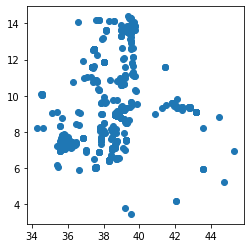

In [88]:
ADMIN0_WITH_EDUC.plot()

In [ ]:
ETHIOPIA_ADM3[ETHIOPIA_ADM3.ADM2_EN=='Guraghe']

In [149]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(5)

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

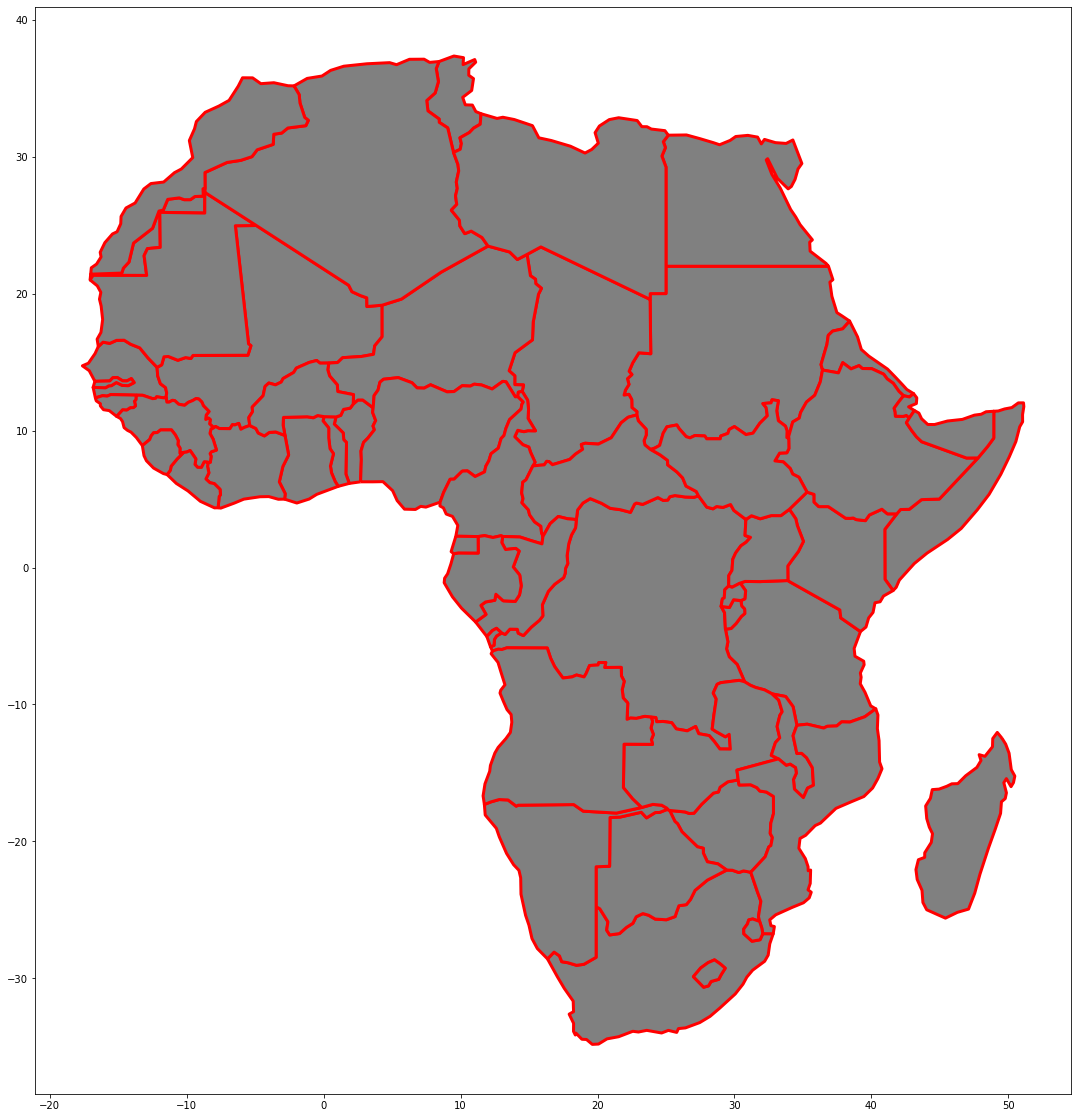

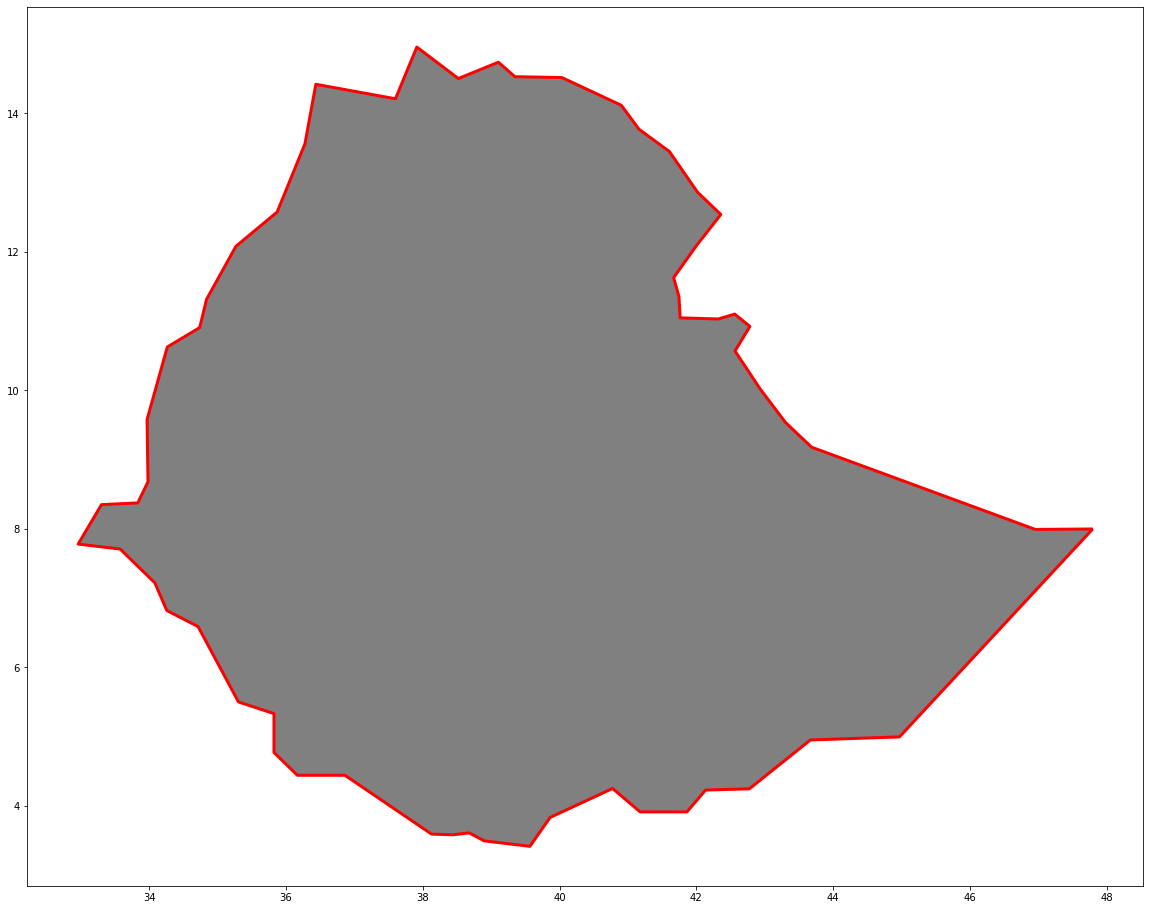

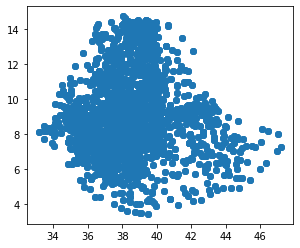

In [151]:
world[world.continent=='Africa'].plot(figsize=(20,20), color='grey', edgecolor='red', linewidth=3)
world[world.name=='Ethiopia'].plot(figsize=(20,20), color='grey', edgecolor='red', linewidth=3)
ETHIOPIA.boundary.plot();